In [1]:
cd src/

c:\Users\edison.yi\Documents\code\deferrence_paper\src


c:\Users\edison.yi\Documents\code\deferrence_paper\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [60]:
# import pymc as pm
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import arviz as az
# import corner
# from scipy.stats import beta, norm, uniform
# from plotting import plot_all_individual_judgements
# from ideal_credences import Ideal_Credences
# from experts import Expert_Group

# class Bayesian_Agent():
#     def __init__(self, ideal_credence_obj: Ideal_Credences) -> None:
#         ''' Initializes the Bayesian_Agent class with an Ideal_Credences object. '''
#         self.priors = {}
#         self.expert_group_models = {}
#         self.ideal_credence_models = {}
#         self.ideal_credence_estimates = {}
#         self.ideal_credences = ideal_credence_obj.credence_function
#         self.propositions = list(self.ideal_credences.keys())

#     def get_hierarchical_model(self, expert_groups: list, prior_distribution='uniform', plot=True, alpha=2, beta=2, expert_bias_prior_mu=0.5, expert_bias_prior_sigma=0.2, expert_sd_prior_sigma=0.2):
#         ''' Sets up a hierarchical model for multiple expert groups and propositions using the specified prior distribution. '''
#         self.expert_groups = expert_groups
#         self.prior_distribution = prior_distribution
#         self.alpha = alpha
#         self.beta = beta
#         self.expert_bias_prior_mu = expert_bias_prior_mu
#         self.expert_bias_prior_sigma = expert_bias_prior_sigma
#         self.expert_sd_prior_sigma = expert_sd_prior_sigma
#         with pm.Model() as hierarchical_model:
#             # Priors for ideal credences for each proposition
#             if prior_distribution == 'uniform':
#                 ideal_credences = pm.Uniform('ideal_credences', lower=0, upper=1, shape=len(self.propositions))
#             elif prior_distribution == 'normal':
#                 ideal_credences = pm.Normal('ideal_credences', mu=0.5, sigma=0.2, shape=len(self.propositions))
#             elif prior_distribution == 'beta':
#                 ideal_credences = pm.Beta('ideal_credences', alpha=alpha, beta=beta, shape=len(self.propositions))

#             # Priors for biases and standard deviations for each expert group
#             expert_biases = pm.Normal('expert_biases', mu=expert_bias_prior_mu, sigma=expert_bias_prior_sigma, shape=(len(expert_groups), len(self.propositions)))
#             expert_sds = pm.HalfNormal('expert_sds', sigma=expert_sd_prior_sigma, shape=len(expert_groups))

#             # Likelihoods
#             for i, expert_group in enumerate(expert_groups):
#                 for j, proposition in enumerate(self.propositions):
#                     expert_judgement = expert_biases[i, j] + ideal_credences[j]
#                     pm.Normal(f'observed_judgements_{i}_{j}', mu=expert_judgement, sigma=expert_sds[i], observed=expert_group.individual_judgements[proposition])

#             self.hierarchical_model = hierarchical_model
#             if plot:
#                 graph = pm.model_to_graphviz(hierarchical_model)
#                 display(graph)

#     def mcmc_get_posteriors(self, draws=1000, tune=500, chains=4, cores=None, target_accept=0.95):
#         ''' Runs MCMC sampling to obtain posterior distributions for the hierarchical model. '''
#         with self.hierarchical_model:
#             idata = pm.sample(draws=draws, tune=tune, chains=chains, cores=cores, target_accept=target_accept)
        
#         self.idata = idata
        
#         return idata

#     def plot_priors_posteriors_truths(self):
#         ''' Custom plotting of priors, posteriors, and truths. '''
#         num_expert_groups = len(self.expert_groups)
#         num_propositions = len(self.propositions)
#         num_params = num_propositions * (1 + num_expert_groups * 2)  # Ideal credences + expert biases + expert SDs
#         fig, axes = plt.subplots(num_params, 3, figsize=(15, 5*num_params))

#         plot_idx = 0

#         for i, prop in enumerate(self.propositions):
#             # Add title for Ideal Credences section
#             fig.suptitle('Ideal Credences', fontsize=16)
#             # Ideal Credences
#             ax_priors, ax_posteriors, ax_truths = axes[plot_idx]

#             x = np.linspace(0, 1, 1000)
#             if self.prior_distribution == 'uniform':
#                 y = uniform.pdf(x, loc=0, scale=1)
#                 mean, sd = 0.5, np.sqrt(1/12)
#             elif self.prior_distribution == 'normal':
#                 y = norm.pdf(x, loc=0.5, scale=0.2)
#                 mean, sd = 0.5, 0.2
#             elif self.prior_distribution == 'beta':
#                 y = beta.pdf(x, a=self.alpha, b=self.beta)
#                 mean, sd = self.alpha / (self.alpha + self.beta), np.sqrt((self.alpha * self.beta) / ((self.alpha + self.beta)**2 * (self.alpha + self.beta + 1)))
#             ax_priors.plot(x, y, label=f'Prior\nMean: {mean:.2f}\nSD: {sd:.2f}')
#             ax_priors.set_title(f'Prior for Ideal Credence {prop}')
#             ax_priors.legend()

#             az.plot_posterior(self.idata, var_names=['ideal_credences'], coords={'ideal_credences_dim_0': [i]}, ax=ax_posteriors)
#             ax_posteriors.set_title(f'Posterior for Ideal Credence {prop}')

#             truth = self.ideal_credences[prop]
#             ax_truths.axvline(truth, color='r', linestyle='--', label='Truth')
#             ax_truths.set_title(f'Truth for Ideal Credence {prop}')
#             ax_truths.legend()

#             plot_idx += 1

#             # Add title for Expert Biases section
#             fig.suptitle('Expert Biases', fontsize=16)
#             # Expert Biases
#             for j in range(num_expert_groups):
#                 ax_priors, ax_posteriors, ax_truths = axes[plot_idx]

#                 x = np.linspace(-1, 2, 1000)
#                 y = norm.pdf(x, loc=self.expert_bias_prior_mu, scale=self.expert_bias_prior_sigma)
#                 mean, sd = self.expert_bias_prior_mu, self.expert_bias_prior_sigma
#                 ax_priors.plot(x, y, label=f'Prior\nMean: {mean:.2f}\nSD: {sd:.2f}')
#                 ax_priors.set_title(f'Prior for Expert Bias {prop} Group {j}')
#                 ax_priors.legend()

#                 coords = {'expert_biases_dim_0': [j], 'expert_biases_dim_1': [i]}
#                 az.plot_posterior(self.idata, var_names=['expert_biases'], coords=coords, ax=ax_posteriors)
#                 ax_posteriors.set_title(f'Posterior for Expert Bias {prop} Group {j}')

#                 truth = self.expert_groups[j].population_bias
#                 ax_truths.axvline(truth, color='r', linestyle='--', label='Truth')
#                 ax_truths.set_title(f'Truth for Expert Bias {prop} Group {j}')
#                 ax_truths.legend()

#                 plot_idx += 1

#             # Add title for Expert SDs section
#             fig.suptitle('Expert Standard Deviations', fontsize=16)
#             # Expert Standard Deviations
#             for j in range(num_expert_groups):
#                 ax_priors, ax_posteriors, ax_truths = axes[plot_idx]

#                 x = np.linspace(0, 1, 1000)
#                 y = (2/(np.pi*self.expert_sd_prior_sigma**2))**0.5 * np.exp(-x**2/(2*self.expert_sd_prior_sigma**2))
#                 mean, sd = (np.pi / 2)**0.5 * self.expert_sd_prior_sigma, (4 - np.pi) / 2 * self.expert_sd_prior_sigma**2
#                 ax_priors.plot(x, y, label=f'Prior\nMean: {mean:.2f}\nSD: {sd:.2f}')
#                 ax_priors.set_title(f'Prior for Expert SD Group {j}')
#                 ax_priors.legend()

#                 az.plot_posterior(self.idata, var_names=['expert_sds'], coords={'expert_sds_dim_0': [j]}, ax=ax_posteriors)
#                 ax_posteriors.set_title(f'Posterior for Expert SD Group {j}')

#                 truth = self.expert_groups[j].population_sd
#                 ax_truths.axvline(truth, color='r', linestyle='--', label='Truth')
#                 ax_truths.set_title(f'Truth for Expert SD Group {j}')
#                 ax_truths.legend()

#                 plot_idx += 1

#         plt.tight_layout()
#         plt.show()

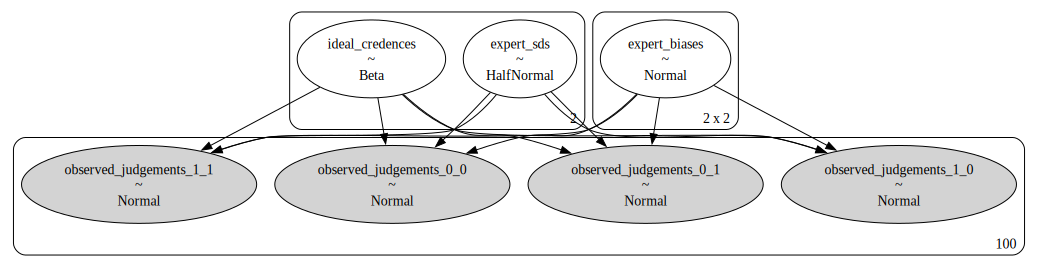

Only 50 samples per chain. Reliable r-hat and ESS diagnostics require longer chains for accurate estimate.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [ideal_credences, expert_biases, expert_sds]


Sampling 1 chain for 10 tune and 50 draw iterations (10 + 50 draws total) took 28 seconds.
The number of samples is too small to check convergence reliably.


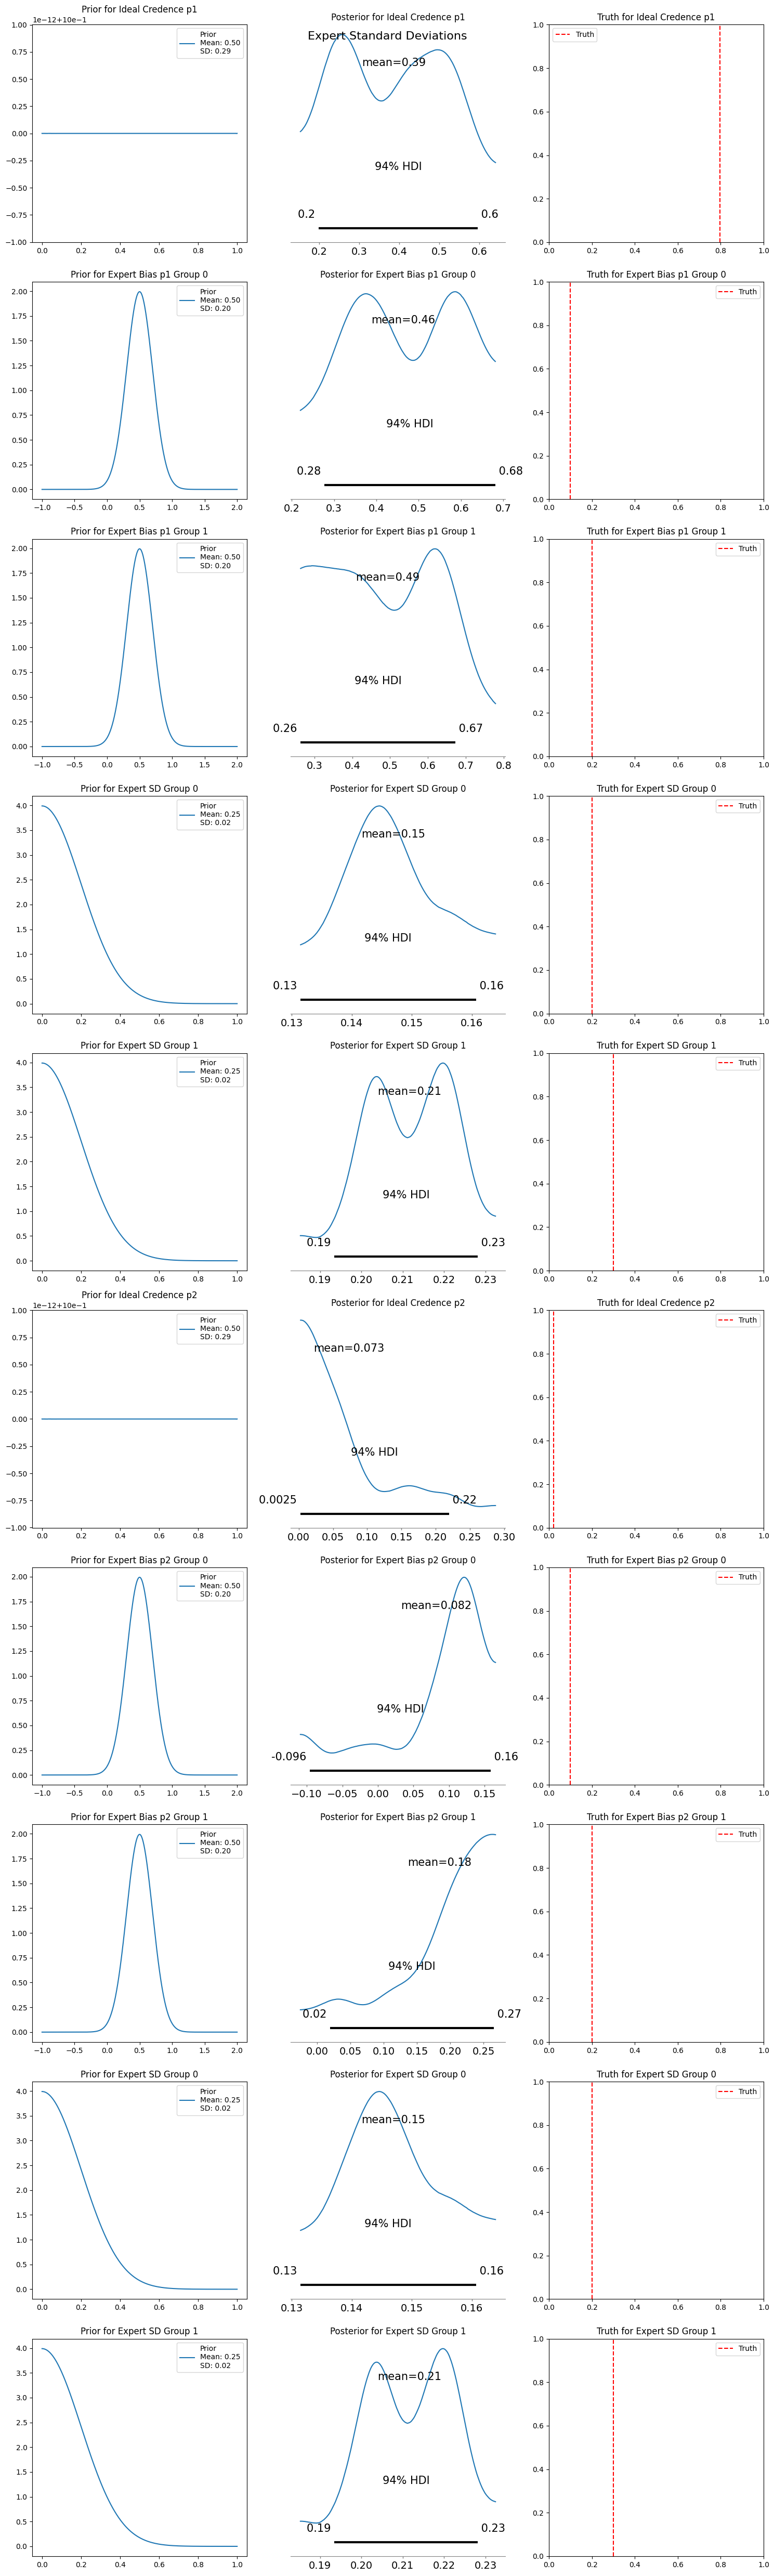

In [61]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import corner
from scipy.stats import beta, norm, uniform
from src.plotting import plot_all_individual_judgements
from src.ideal_credences import Ideal_Credences
from src.experts import Expert_Group
from src.bayesian_agent import Bayesian_Agent
# Usage example
# Initialize ideal credences
ideal_credences = Ideal_Credences(propositions=['p1', 'p2'])
ideal_credences.random_generate_ideal_credences()

# Initialize expert groups
expert_group1 = Expert_Group(ideal_credences, name='Group 1', n_experts=100, population_sd=0.2, population_bias=0.1)
expert_group2 = Expert_Group(ideal_credences, name='Group 2', n_experts=100, population_sd=0.3, population_bias=0.2)

# Initialize Bayesian agent
bayesian_agent = Bayesian_Agent(ideal_credences)

# Generate hierarchical model for multiple groups
bayesian_agent.get_hierarchical_model(expert_groups=[expert_group1, expert_group2], prior_distribution='beta', alpha=1, beta=1)

# Run MCMC to get posteriors for the hierarchical model
results = bayesian_agent.mcmc_get_posteriors(draws=50, tune=10, chains=1,target_accept=0.8)

# Plot priors, posteriors, and truths
bayesian_agent.plot_priors_posteriors_truths()

In [17]:
results.posterior.keys()

KeysView(<xarray.Dataset> Size: 5kB
Dimensions:                (chain: 1, draw: 50, expert_biases_dim_0: 2,
                            expert_biases_dim_1: 3, expert_sds_dim_0: 2,
                            ideal_credences_dim_0: 3)
Coordinates:
  * chain                  (chain) int32 4B 0
  * draw                   (draw) int32 200B 0 1 2 3 4 5 6 ... 44 45 46 47 48 49
  * expert_biases_dim_0    (expert_biases_dim_0) int32 8B 0 1
  * expert_biases_dim_1    (expert_biases_dim_1) int32 12B 0 1 2
  * expert_sds_dim_0       (expert_sds_dim_0) int32 8B 0 1
  * ideal_credences_dim_0  (ideal_credences_dim_0) int32 12B 0 1 2
Data variables:
    expert_biases          (chain, draw, expert_biases_dim_0, expert_biases_dim_1) float64 2kB ...
    expert_sds             (chain, draw, expert_sds_dim_0) float64 800B 0.155...
    ideal_credences        (chain, draw, ideal_credences_dim_0) float64 1kB 0...
Attributes:
    created_at:                 2024-06-09T15:18:17.723423+00:00
    arviz_version:

In [4]:
bayesian_agent.ideal_credences

{'p1': 0.8268665774102898, 'p2': 0.8380833296730611, 'p3': 0.43909605123251116}